<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Port_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade yfinance

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import pandas_datareader as pdr
import yfinance as yf
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [3]:
from datetime import datetime
start = datetime(2000,1,1)
end = datetime(2025,11,17)

In [4]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI225
data5 = yf.download('^NSEI', start, end) # NIFTY 50

/tmp/ipython-input-2412570645.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^GSPC', start, end) # S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2412570645.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('^GDAXI',start, end) # DAX
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2412570645.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data3 = yf.download('^KS11', start, end) # KOSPI
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2412570645.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data4 = yf.download('^N225', start, end) # NIKKEI225
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2412570645.py:12: FutureWarning: YF.down

In [5]:
data5.head()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [6]:
data6 = pd.merge(data1[['Close']], data2[['Close']],left_index=True, right_index=True, how='inner')
data6.columns=['SP500','DAX']

data7 = pd.merge(data3[['Close']], data4[['Close']],left_index=True, right_index=True, how='inner')
data7.columns=['KOSPI','NIKKEI']

data8 = pd.merge(data7, data5['Close'],left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI','NIFTY']

data = pd.merge(data6, data8,left_index=True, right_index=True, how='inner')

In [7]:
data.head()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
Date,,,,,
2007-09-18,1519.780029,7575.209961,1838.609985,15801.799805,4546.200195
2007-09-19,1529.030029,7750.839844,1902.650024,16381.540039,4732.350098
2007-09-20,1518.750000,7735.089844,1908.969971,16413.789062,4747.549805
2007-09-21,1525.750000,7794.430176,1919.260010,16312.610352,4837.549805
2007-09-27,1531.380005,7853.790039,1945.280029,16832.220703,5000.549805


In [8]:
data.tail()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
Date,,,,,
2025-11-10,6832.430176,23959.990234,4073.239990,50911.761719,25574.349609
2025-11-11,6846.609863,24088.060547,4106.390137,50842.929688,25694.949219
2025-11-12,6850.919922,24381.460938,4150.390137,51063.308594,25875.800781
2025-11-13,6737.490234,24041.619141,4170.629883,51281.828125,25879.150391
2025-11-14,6734.109863,23876.550781,4011.570068,50376.531250,25910.050781


<Axes: xlabel='Date'>

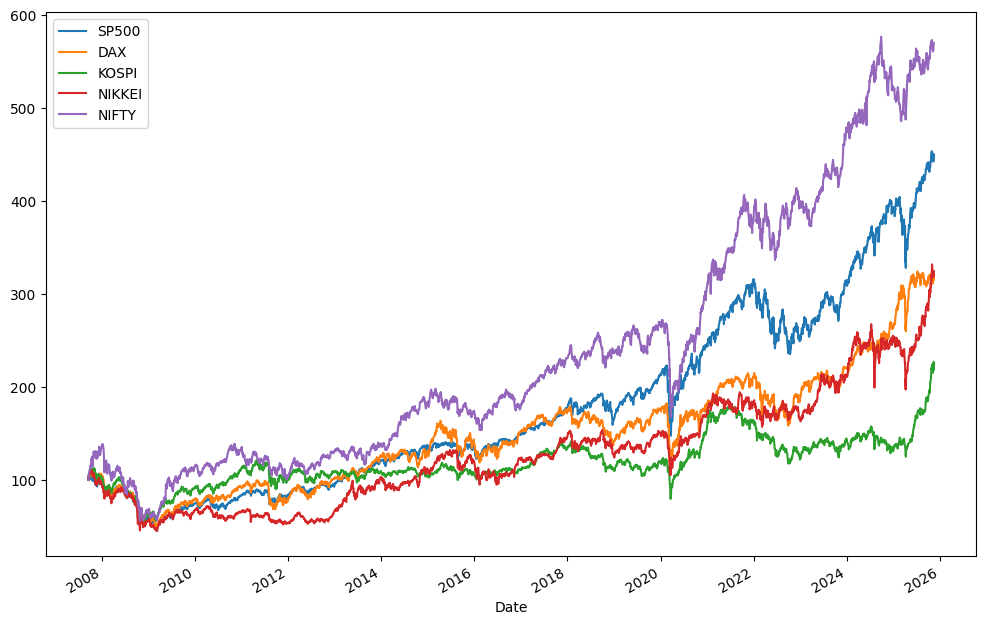

In [9]:
(data / data.iloc[0] * 100).plot(figsize=(12, 8))

In [10]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
Date,,,,,
2007-09-18,NaN,NaN,NaN,NaN,NaN
2007-09-19,0.006068,0.022920,0.034238,0.036031,0.040130
2007-09-20,-0.006746,-0.002034,0.003316,0.001967,0.003207
2007-09-21,0.004598,0.007642,0.005376,-0.006183,0.018780
2007-09-27,0.003683,0.007587,0.013466,0.031356,0.033140


array([[<Axes: title={'center': 'SP500'}>,
        <Axes: title={'center': 'DAX'}>],
       [<Axes: title={'center': 'KOSPI'}>,
        <Axes: title={'center': 'NIKKEI'}>],
       [<Axes: title={'center': 'NIFTY'}>, <Axes: >]], dtype=object)

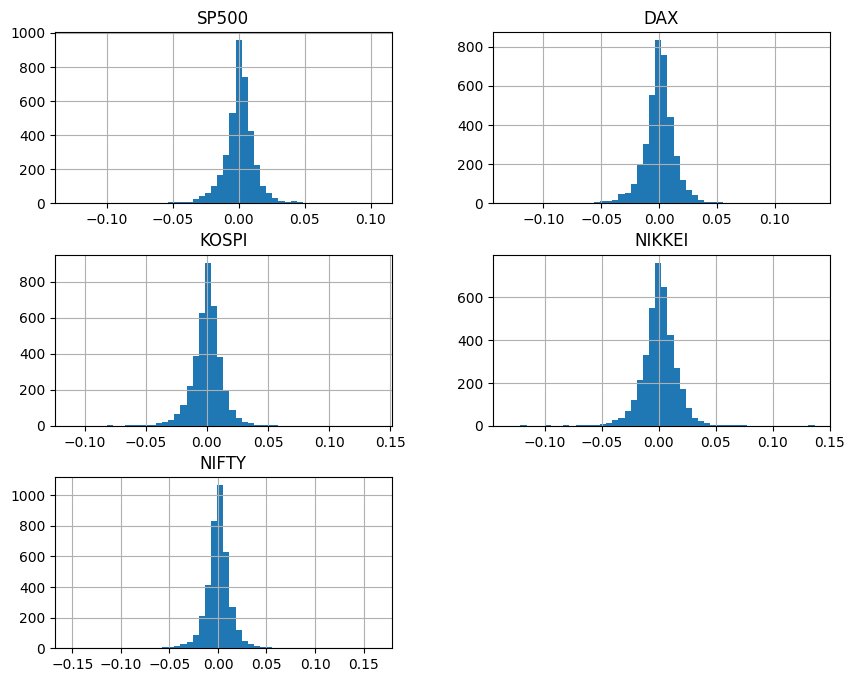

In [11]:
log_returns.hist(bins=50, figsize=(10, 8))

Text(0, 0.5, 'sample quantiles')

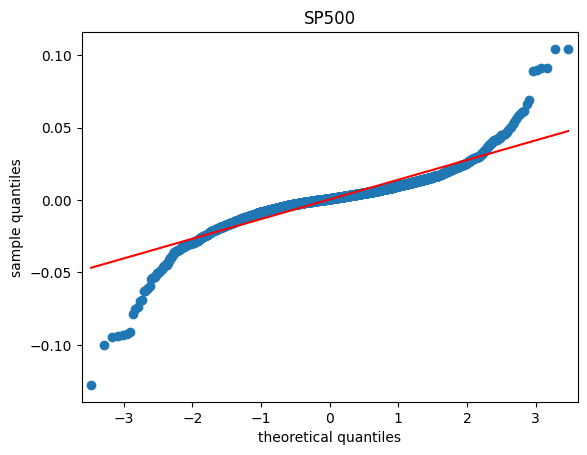

In [12]:
sm.qqplot(log_returns['SP500'].dropna(), line='s')
plt.title('SP500')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

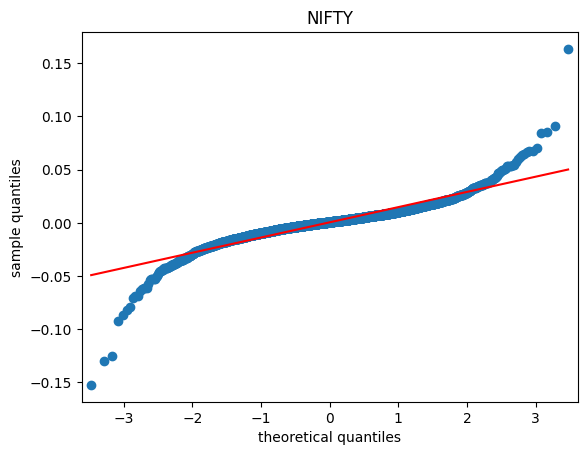

In [13]:
sm.qqplot(log_returns['NIFTY'].dropna(), line='s')
plt.title('NIFTY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

### Portfolio Optimization

In [14]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'NIFTY']
noa = len(symbols)

In [15]:
rets = np.log(data / data.shift(1))

In [16]:
rets.mean() * 252

,0
SP500,0.097235
DAX,0.074987
KOSPI,0.050960
NIKKEI,0.075731
NIFTY,0.113677


In [17]:
rets.std()*np.sqrt(252)

,0
SP500,0.215697
DAX,0.231821
KOSPI,0.213631
NIKKEI,0.256929
NIFTY,0.226910


In [18]:
rets.cov() * 252

,SP500,DAX,KOSPI,NIKKEI,NIFTY
SP500,0.046525,0.031932,0.013572,0.014442,0.017127
DAX,0.031932,0.053741,0.020515,0.025002,0.023784
KOSPI,0.013572,0.020515,0.045638,0.036220,0.023985
NIKKEI,0.014442,0.025002,0.036220,0.066012,0.025131
NIFTY,0.017127,0.023784,0.023985,0.025131,0.051488


In [19]:
rets.corr()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
SP500,1.000000,0.638605,0.294532,0.260595,0.349934
DAX,0.638605,1.000000,0.414233,0.419767,0.452153
KOSPI,0.294532,0.414233,1.000000,0.659891,0.494799
NIKKEI,0.260595,0.419767,0.659891,1.000000,0.431075
NIFTY,0.349934,0.452153,0.494799,0.431075,1.000000


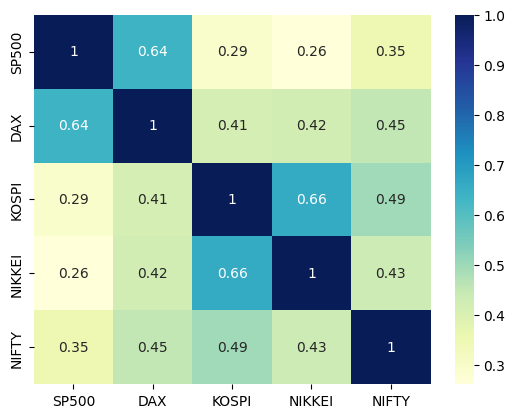

In [20]:
sns.heatmap(rets.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [21]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [22]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [23]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [24]:
prets = []
pvols = []
for p in range (25000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

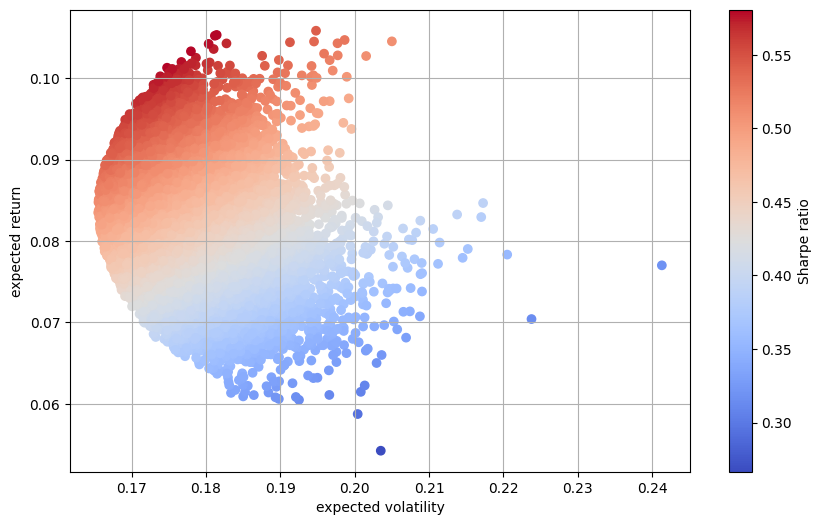

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
pvols = np.array(pvols)

In [26]:
import scipy.optimize as sco

In [27]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [28]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [29]:
bnds = tuple((0, 1) for x in range(noa))

In [30]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [31]:
min_func_sharpe(eweights)

np.float64(-0.48395256159951777)

In [32]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)

CPU times: user 52.7 ms, sys: 919 µs, total: 53.7 ms
Wall time: 70.2 ms


In [33]:
opts

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.5830248938626944
           x: [ 4.356e-01  5.248e-17  0.000e+00  6.597e-02  4.984e-01]
         nit: 5
         jac: [ 5.841e-05  8.186e-02  8.542e-02 -1.246e-05 -4.938e-05]
        nfev: 30
        njev: 5
 multipliers: [-1.268e-05]

In [34]:
opts['x'].round(3)

array([0.436, 0.   , 0.   , 0.066, 0.498])

In [35]:
port_ret(opts['x']).round(3)

np.float64(0.104)

In [36]:
port_vol(opts['x']).round(3)

np.float64(0.178)

In [37]:
port_ret(opts['x']) / port_vol(opts['x'])

np.float64(0.5830248938626944)

In [38]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [39]:
optv

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.16547193656654186
           x: [ 3.636e-01  5.162e-02  3.025e-01  6.915e-02  2.132e-01]
         nit: 9
         jac: [ 1.651e-01  1.655e-01  1.657e-01  1.657e-01  1.657e-01]
        nfev: 54
        njev: 9
 multipliers: [ 1.655e-01]

In [40]:
optv['x'].round(3)

array([0.364, 0.052, 0.302, 0.069, 0.213])

In [41]:
port_ret(optv['x']).round(3)

np.float64(0.084)

In [42]:
port_vol(optv['x']).round(3)

np.float64(0.165)

In [43]:
port_ret(optv['x']) / port_vol(optv['x'])

np.float64(0.5083004388138351)

In [44]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [45]:
bnds = tuple((0, 1) for x in weights)

In [46]:
%%time
trets = np.linspace(0.02, 0.1, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 6.43 s, sys: 4.76 ms, total: 6.43 s
Wall time: 7.15 s


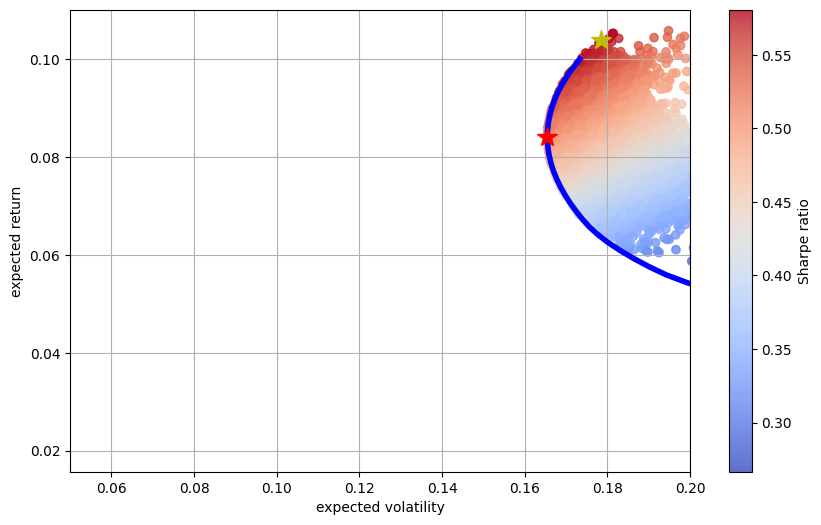

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', alpha=0.8, cmap='coolwarm')  # 무작위 포트폴리오
plt.plot(tvols, trets, 'b', lw=4.0)  # 효율적 투자선
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)   # 최대 샤프지수를 가진 포트폴리오
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)   # 최소 분산 포트폴리오
plt.grid(True)
plt.xlim([0.05, 0.2])
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [48]:
bnds = len(symbols) * [(0, 1),]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [49]:
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}

In [50]:
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252  # annualized
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252 , weights)) ** 0.5  # annualized
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [53]:
opt_weights ={}
for year in range(2010, 2026):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    ow = sco.minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']
    opt_weights[year] = ow.round(4)

In [54]:
opt_weights

{2010: array([0.    , 0.1376, 0.6701, 0.    , 0.1923]),
 2011: array([1., 0., 0., 0., 0.]),
 2012: array([0.    , 0.2188, 0.    , 0.3098, 0.4713]),
 2013: array([0.7641, 0.0282, 0.    , 0.2078, 0.    ]),
 2014: array([0.2469, 0.    , 0.    , 0.    , 0.7531]),
 2015: array([0.    , 0.4045, 0.    , 0.5955, 0.    ]),
 2016: array([0.9381, 0.    , 0.0619, 0.    , 0.    ]),
 2017: array([0.4949, 0.    , 0.1709, 0.    , 0.3342]),
 2018: array([0., 0., 0., 0., 1.]),
 2019: array([0.6429, 0.034 , 0.    , 0.1592, 0.1639]),
 2020: array([0.0606, 0.    , 0.9394, 0.    , 0.    ]),
 2021: array([0.7046, 0.    , 0.    , 0.    , 0.2954]),
 2022: array([0., 0., 0., 0., 1.]),
 2023: array([0.3355, 0.0132, 0.    , 0.1656, 0.4857]),
 2024: array([0.5637, 0.3675, 0.    , 0.    , 0.0688]),
 2025: array([0.1701, 0.    , 0.8299, 0.    , 0.    ])}